<a href="https://colab.research.google.com/github/arthurabelo/AnaliseFilmesPandas/blob/main/Analise_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DE DADOS DE PRODUÇÃO E ARRECADAÇÃO DE FILMES

## PREPARAÇÃO

### INSTALAR E IMPORTAR DEPENDÊNCIAS

In [18]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [19]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

### IMPORTAR OS DADOS

### REMOVER ARQUIVOS EXISTENTES

In [20]:
!rm -rf *.csv

### IMPORTAR CSV

In [21]:
!wget https://raw.githubusercontent.com/armandossrecife/lp20231/main/top-500-movies.csv

--2024-07-09 15:32:32--  https://raw.githubusercontent.com/armandossrecife/lp20231/main/top-500-movies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69811 (68K) [text/plain]
Saving to: ‘top-500-movies.csv’

top-500-movies.csv  100%[===================>]  68.17K  --.-KB/s    in 0.02s   

2024-07-09 15:32:33 (3.40 MB/s) - ‘top-500-movies.csv’ saved [69811/69811]



### CRIAR DATAFRAME

In [22]:
df_filmes = pd.read_csv('top-500-movies.csv', sep=',')
df_filmes

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,2013-02-06,A Good Day to Die Hard,/movie/Die-Hard-5#tab=summary,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013.0
496,497,2004-04-09,The Alamo,/movie/Alamo-The-(2004)#tab=summary,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004.0
497,498,1995-12-22,Cutthroat Island,/movie/Cutthroat-Island#tab=summary,92000000,10017322,18517322,2371415.0,PG-13,Adventure,1619.0,NaN,1995.0
498,499,2013-12-19,The Secret Life of Walter Mitty,/movie/Secret-Life-of-Walter-Mitty-The-(2012)#...,91000000,58236838,187861183,12765508.0,PG,Adventure,2922.0,114.0,2013.0


In [23]:
#Informações do dataframe
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             500 non-null    int64  
 1   release_date     499 non-null    object 
 2   title            500 non-null    object 
 3   url              500 non-null    object 
 4   production_cost  500 non-null    int64  
 5   domestic_gross   500 non-null    int64  
 6   worldwide_gross  500 non-null    int64  
 7   opening_weekend  479 non-null    float64
 8   mpaa             492 non-null    object 
 9   genre            495 non-null    object 
 10  theaters         479 non-null    float64
 11  runtime          487 non-null    float64
 12  year             499 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 50.9+ KB


In [24]:
# Checa os valores "ausentes"
release_date_null = df_filmes['release_date'].isnull()
opening_weekend_null = df_filmes['opening_weekend'].isnull()
mpaa_null = df_filmes['mpaa'].isnull()
genre_null = df_filmes['genre'].isnull()
theaters_null = df_filmes['theaters'].isnull()
runtime_null = df_filmes['runtime'].isnull()
year_null = df_filmes['year'].isnull()

In [25]:
print("release-data: ", len(df_filmes[release_date_null]))
print("opening_weekend: ", len(df_filmes[opening_weekend_null]))
print("mpaa: ", len(df_filmes[mpaa_null]))
print("genre: ", len(df_filmes[genre_null]))
print("theaters: ", len(df_filmes[theaters_null]))
print("runtime: ", len(df_filmes[runtime_null]))
print("year: ", len(df_filmes[year_null]))

release-data:  1
opening_weekend:  21
mpaa:  8
genre:  5
theaters:  21
runtime:  13
year:  1


In [26]:
df_filmes.columns

Index(['rank', 'release_date', 'title', 'url', 'production_cost',
       'domestic_gross', 'worldwide_gross', 'opening_weekend', 'mpaa', 'genre',
       'theaters', 'runtime', 'year'],
      dtype='object')

## 1. ANÁLISE DE CORRELAÇÃO ENTRE COLUNAS

Coeficiente de Pearson

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Interpretando o coeficiente de Pearson

* 0.9 para mais ou para menos indica uma correlação muito forte.
* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
* 0 a 0.3 positivo ou negativo indica uma correlação desprezível.



In [27]:
colunas_numericas = ['rank', 'production_cost', 'domestic_gross', 'worldwide_gross', 'opening_weekend', 'theaters', 'runtime', 'year']

In [35]:
correlacao = df_filmes[colunas_numericas].corr(method="pearson")
correlacao

,rank,production_cost,domestic_gross,worldwide_gross,opening_weekend,theaters,runtime,year
rank,1.000000,-0.921557,-0.460587,-0.492761,-0.520052,-0.547803,-0.219339,-0.296317
production_cost,-0.921557,1.000000,0.485815,0.537454,0.579395,0.502060,0.273057,0.289846
domestic_gross,-0.460587,0.485815,1.000000,0.930380,0.886058,0.544418,0.262348,0.041829
worldwide_gross,-0.492761,0.537454,0.930380,1.000000,0.822920,0.536755,0.313970,0.104909
opening_weekend,-0.520052,0.579395,0.886058,0.822920,1.000000,0.615205,0.261564,0.209180
theaters,-0.547803,0.502060,0.544418,0.536755,0.615205,1.000000,-0.012624,0.509213
runtime,-0.219339,0.273057,0.262348,0.313970,0.261564,-0.012624,1.000000,0.003725
year,-0.296317,0.289846,0.041829,0.104909,0.209180,0.509213,0.003725,1.000000


<Axes: >

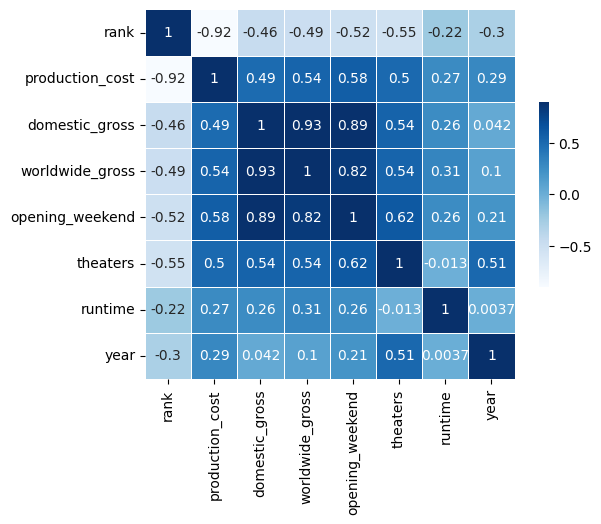

In [42]:
sb.heatmap(correlacao, cmap='Blues', annot=True, vmax=.9, vmin=-.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 2.

### 2.1 20 FILMES COM MAIOR CUSTO DE PRODUÇÃO

In [30]:
df_filmes_20_maiores_custos = df_filmes.sort_values(by='production_cost', ascending=False).head(20)
df_filmes_20_maiores_custos['ranking'] = range(1, 21)
df_filmes_20_maiores_custos.loc[:, ['rank', 'title', 'production_cost']]

,rank,title,production_cost
0,1,Avengers: Endgame,400000000
1,2,Pirates of the Caribbean: On Stranger Tides,379000000
2,3,Avengers: Age of Ultron,365000000
3,4,Star Wars Ep. VII: The Force Awakens,306000000
4,5,Avengers: Infinity War,300000000
5,6,Pirates of the Caribbean: At World’s End,300000000
6,7,Justice League,300000000
7,8,Spectre,300000000
8,9,Mission: Impossible Dead Reckoning Part One,290000000
9,10,Star Wars: The Rise of Skywalker,275000000


### 2.2 20 FILMES COM MAIOR BILHETERIA MUNDIAL

In [31]:
df_filmes_20_maiores_custos = df_filmes.sort_values(by='worldwide_gross', ascending=False).head(20)
df_filmes_20_maiores_custos['ranking'] = range(1, 21)
df_filmes_20_maiores_custos.loc[:, ['ranking', 'title', 'worldwide_gross']]

,ranking,title,worldwide_gross
24,1,Avatar,2910370905
0,2,Avengers: Endgame,2797800564
48,3,Titanic,2207986545
3,4,Star Wars Ep. VII: The Force Awakens,2064615817
4,5,Avengers: Infinity War,2048359754
46,6,Spider-Man: No Way Home,1912775610
37,7,Jurassic World,1669979967
14,8,The Lion King,1647778651
29,9,The Avengers,1515100211
89,10,Furious 7,1514553486


## 3.

### 3.1 GÊNEROS DOS 20 FILMES COM MAIOR CUSTO DE PRODUÇÃO

In [32]:
df_filmes_20_maiores_custos = df_filmes.sort_values(by='production_cost', ascending=False).head(20)
df_filmes_20_maiores_custos['ranking'] = range(1, 21)
df_filmes_20_maiores_custos.loc[:, ['rank', 'title', 'genre', 'production_cost']]

,rank,title,genre,production_cost
0,1,Avengers: Endgame,Action,400000000
1,2,Pirates of the Caribbean: On Stranger Tides,Adventure,379000000
2,3,Avengers: Age of Ultron,Action,365000000
3,4,Star Wars Ep. VII: The Force Awakens,Adventure,306000000
4,5,Avengers: Infinity War,Action,300000000
5,6,Pirates of the Caribbean: At World’s End,Adventure,300000000
6,7,Justice League,Action,300000000
7,8,Spectre,Action,300000000
8,9,Mission: Impossible Dead Reckoning Part One,Action,290000000
9,10,Star Wars: The Rise of Skywalker,Adventure,275000000


### 3.2 GÊNEROS DOS 20 FILMES COM MAIOR BILHETERIA MUNDIAL

In [33]:
df_filmes_20_maiores_custos = df_filmes.sort_values(by='worldwide_gross', ascending=False).head(20)
df_filmes_20_maiores_custos['ranking'] = range(1, 21)
df_filmes_20_maiores_custos.loc[:, ['ranking', 'title', 'genre', 'worldwide_gross']]

,ranking,title,genre,worldwide_gross
24,1,Avatar,Action,2910370905
0,2,Avengers: Endgame,Action,2797800564
48,3,Titanic,Drama,2207986545
3,4,Star Wars Ep. VII: The Force Awakens,Adventure,2064615817
4,5,Avengers: Infinity War,Action,2048359754
46,6,Spider-Man: No Way Home,Action,1912775610
37,7,Jurassic World,Action,1669979967
14,8,The Lion King,Adventure,1647778651
29,9,The Avengers,Action,1515100211
89,10,Furious 7,Action,1514553486


## 4. MÉDIA DE ARRECADAÇÃO DOS 20 FILMES COM MAIOR BILHETERIA MUNDIAL

In [34]:
df_filmes_20_maiores_bilheteria = df_filmes.sort_values(by='worldwide_gross', ascending=False).head(20)
media_arrecadacao = df_filmes_20_maiores_bilheteria['worldwide_gross'].mean()
print(f"A média de arrecadação dos 20 filmes com maior bilheteria mundial é: US${media_arrecadacao}")


A média de arrecadação dos 20 filmes com maior bilheteria mundial é: US$1683804948.85


## 5. ARRECADAÇÃO DOS 20 FILMES COM MAIOR BILHETERIA MUNDIAL

## 6. PERCENTUAL DE PARTICIPAÇÃO DOS 20 FILMES COM MAIOR BILHETERIA MUNDIAL

## 7. GRÁFICO DE SÉRIE TEMPORAL QUE REPRESENTA A EVOLUÇÃO DO VALOR TOTAL DE ARRECADAÇÃO DOS 20 FILMES COM MAIOR BILHETERIA MUNDIAL AO LONGO DOS ÚLTIMOS 25 ANOS

## 8. MÉDIA DE ARRECADAÇÃO DE BILHETERIA MUNDIAL DOS 20 FILMES DE AÇÃO COM MAIOR BILHETERIA MUNDIAL

## 9. MÉDIA DE CUSTO DE PRODUÇÃO DOS 20 FILMES DE AVENTURA COM MAIOR BILHETERIA MUNDIAL


## 10. GRÁFICO QUE AGRUPA OS FILMES POR GÊNERO E MOSTRA O PERCENTUAL DE PARTICIPAÇÃO DE PARTICIPAÇÃO MUNDIAL DE TODOS OS FILMES DO DATASET POR GÊNERO